# 1. Data Collection

In [1]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import missingno as msno


In [3]:
# Load the loan eligibility dataset into a pandas DataFrame
Loan_Lens_data_df = pd.read_csv("C:/Users/Administrator/Desktop/LoanEligibility/LoanEligibility/Data/loan_data.csv")


In [4]:
#Shows five row from the dataset
Loan_Lens_data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# To know the shape of the dataset
Loan_Lens_data_df.shape

(614, 13)

In [6]:
# To show the important information from the dataset
Loan_Lens_data_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Display summary information about the DataFrame, including column names, non-null counts, and data types
Loan_Lens_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
Loan_Lens_data_df.duplicated().sum()

0

#### Visualizations to understand the distribution and patterns in the dataset before preprocessing

##### Bar plots for categorical variable distribution

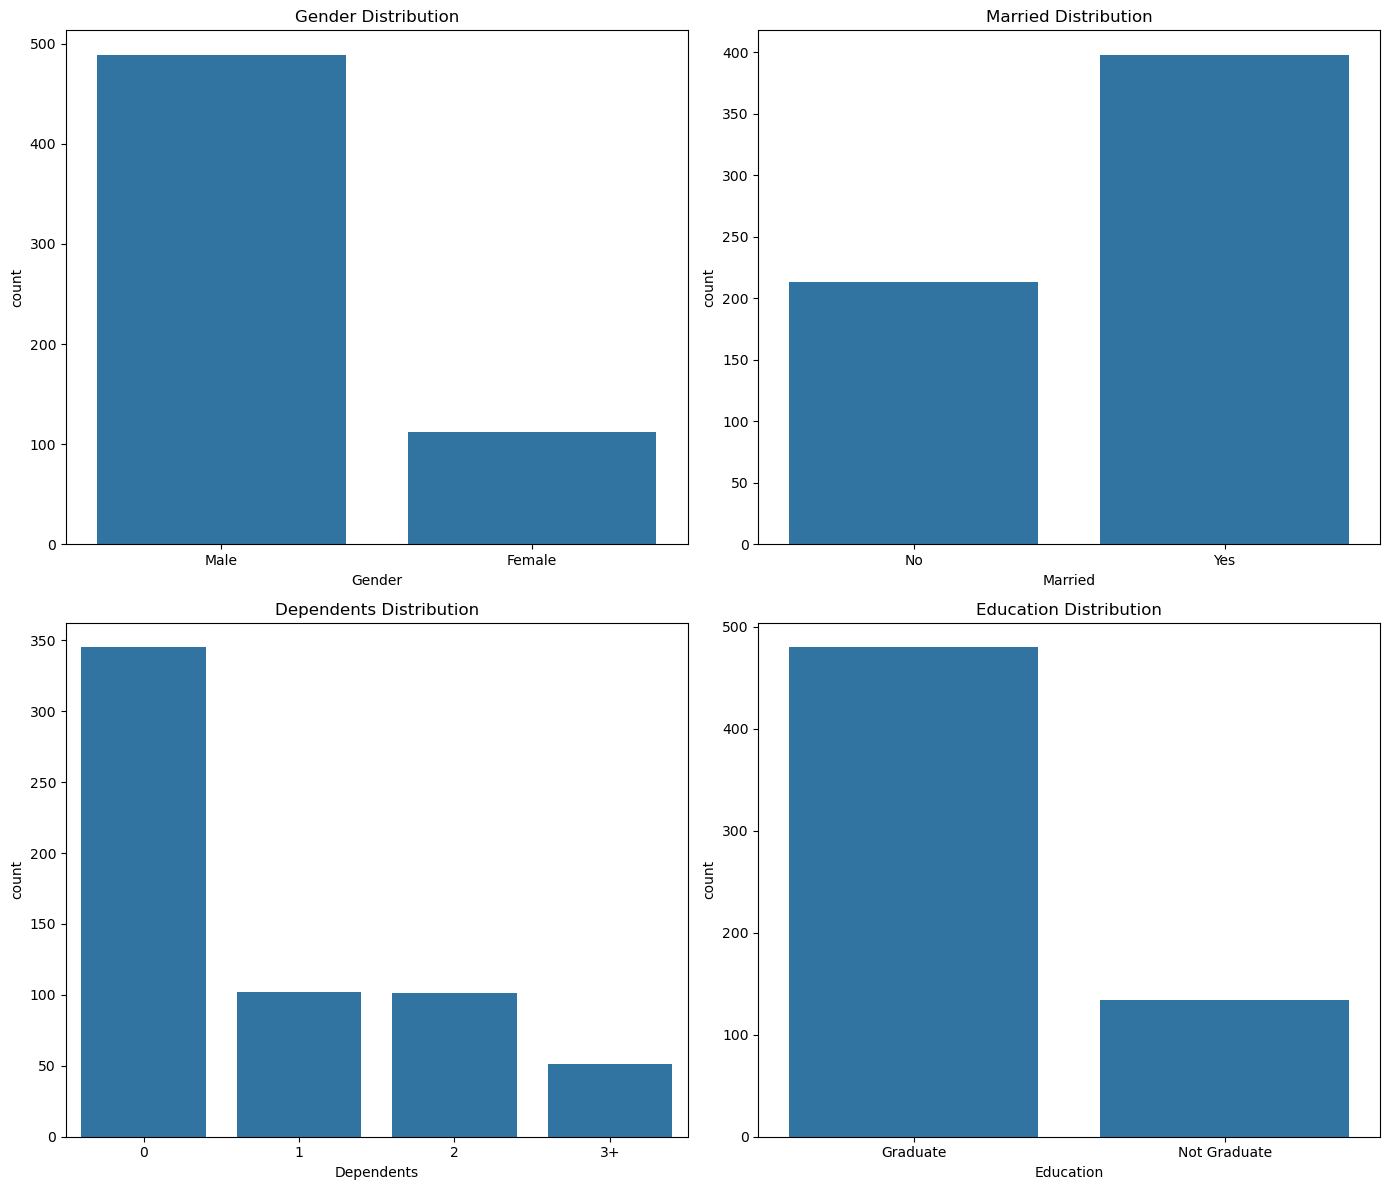

In [9]:
# Figure 1
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=Loan_Lens_data_df)
plt.title('Gender Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='Married', data=Loan_Lens_data_df)
plt.title('Married Distribution')

plt.subplot(2, 2, 3)
sns.countplot(x='Dependents', data=Loan_Lens_data_df)
plt.title('Dependents Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='Education', data=Loan_Lens_data_df)
plt.title('Education Distribution')

plt.tight_layout()
plt.show()


# 3. Exploratory Data Analysis (EDA)

In [10]:
#Column in the dataset
columns = Loan_Lens_data_df.columns 
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
# Loop through all columns in the dataset and identify categorical (object) columns.
# For each categorical column, print the count of unique values and the number of missing values.
def explore_object_type(df, column):
    print(df[column].value_counts())
    print("Missing values:", df[column].isnull().sum())


In [12]:

for featureName in columns:
    if Loan_Lens_data_df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(Loan_Lens_data_df, str(featureName))


"Loan_ID's" Values with count are :
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64
Missing values: 0

"Gender's" Values with count are :
Gender
Male      489
Female    112
Name: count, dtype: int64
Missing values: 13

"Married's" Values with count are :
Married
Yes    398
No     213
Name: count, dtype: int64
Missing values: 3

"Dependents's" Values with count are :
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Missing values: 15

"Education's" Values with count are :
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Missing values: 0

"Self_Employed's" Values with count are :
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Missing values: 32

"Property_Area's" Values with count are :
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dty

<Axes: >

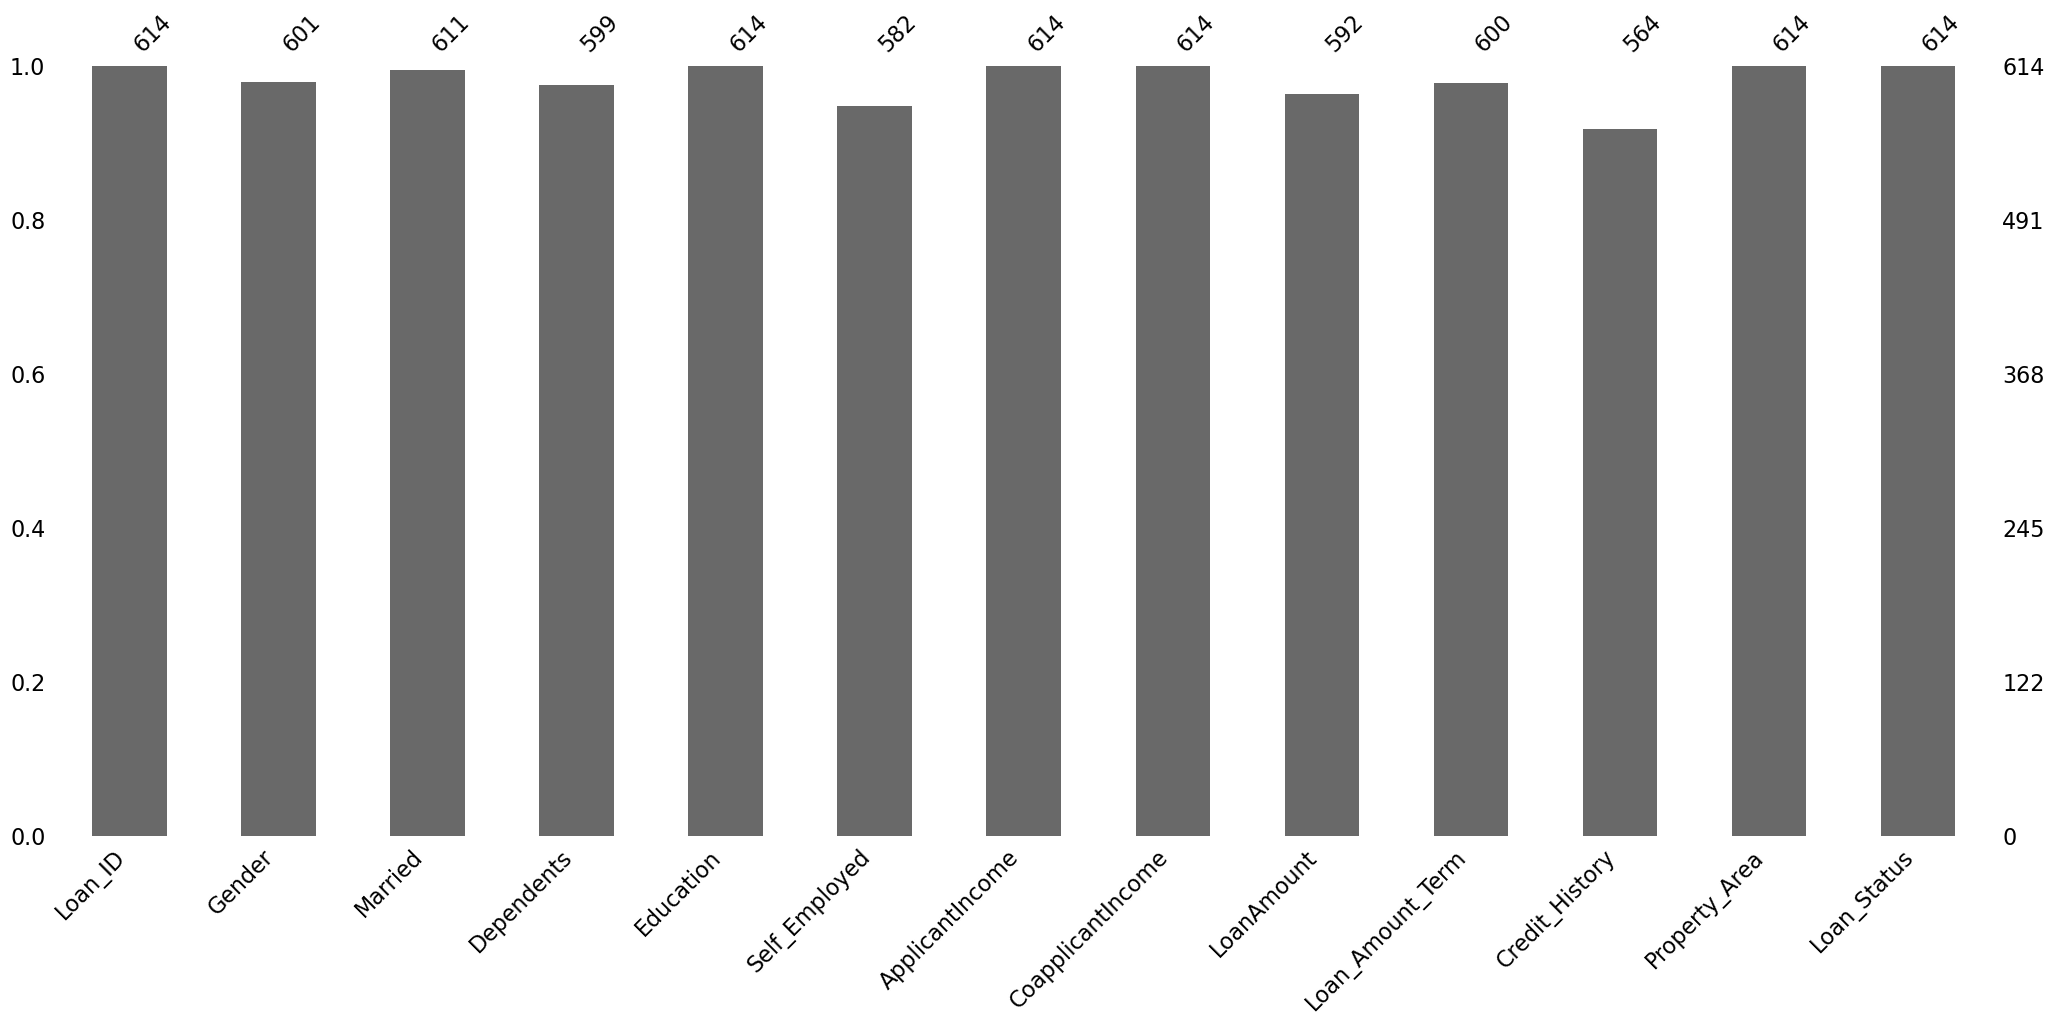

In [13]:
# Show a bar plot of missing values per column
msno.bar(Loan_Lens_data_df)

<Axes: >

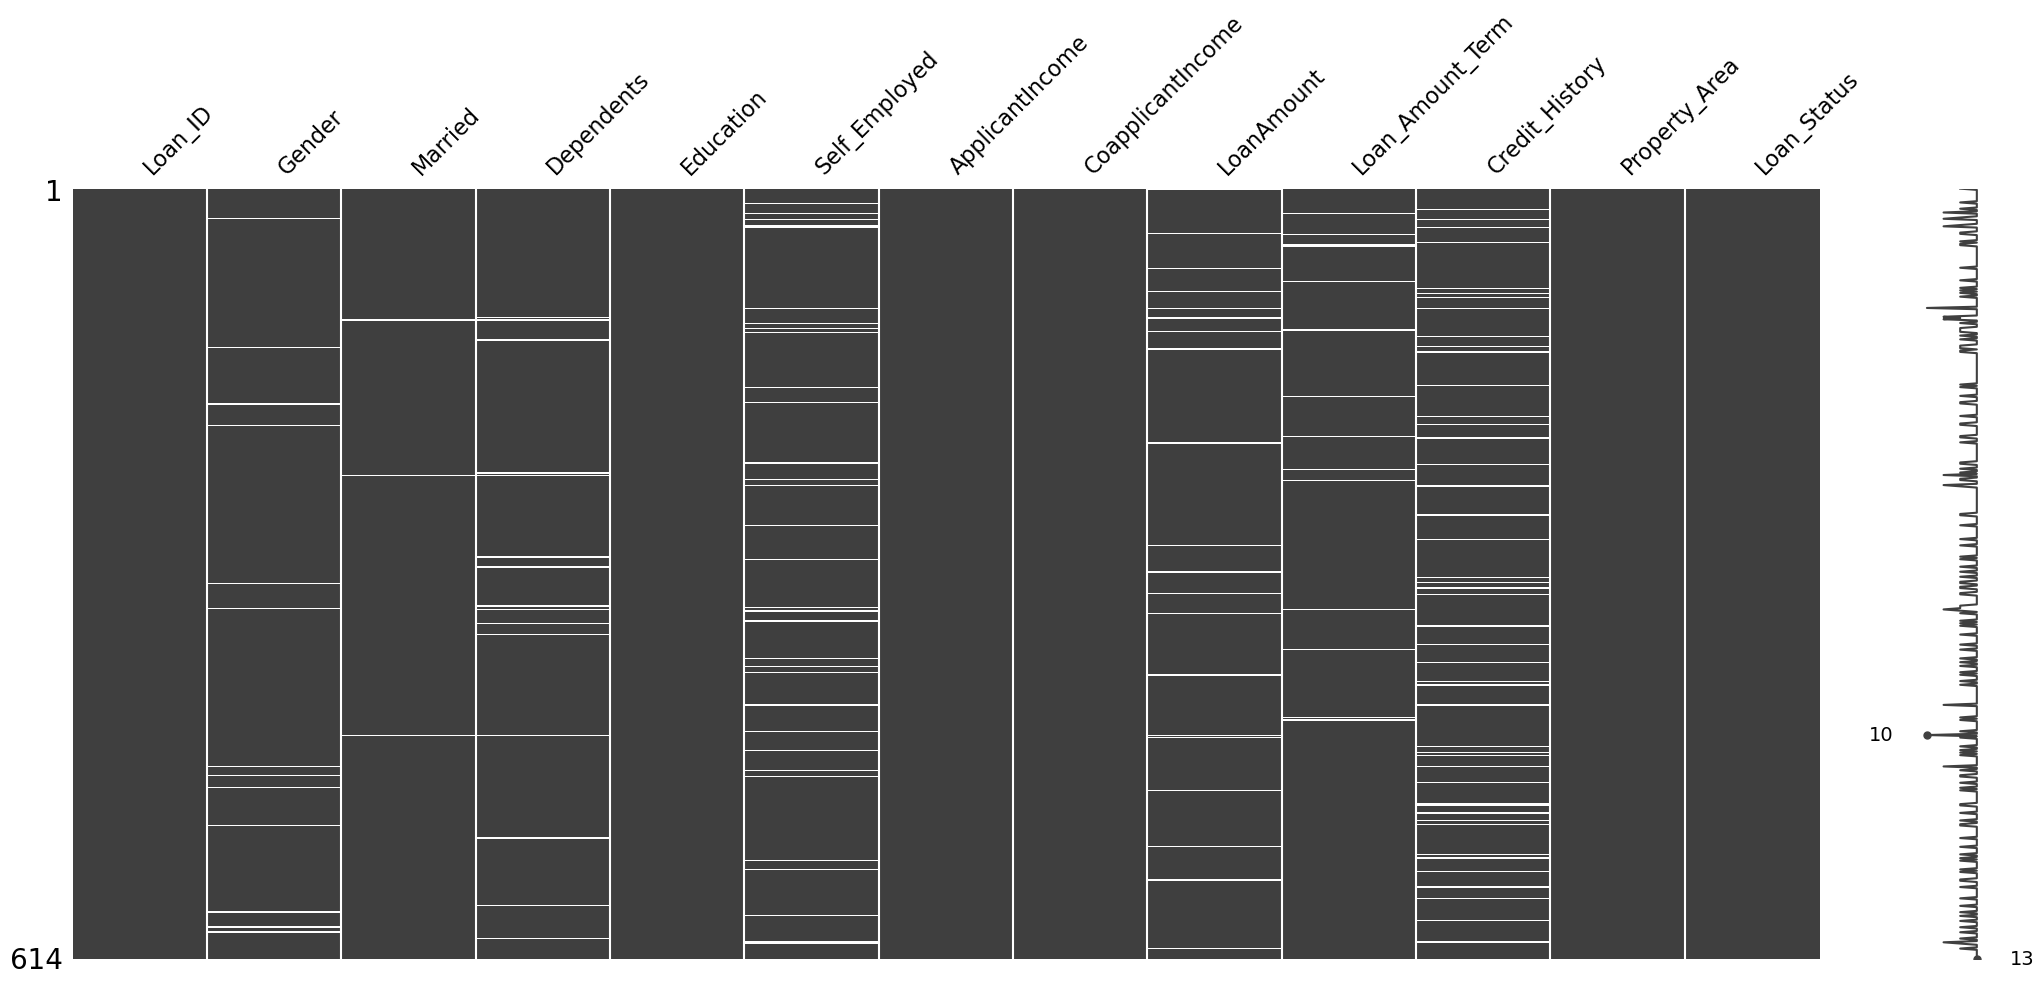

In [14]:
# Show a matrix view of missing data across rows and columns
msno.matrix(Loan_Lens_data_df )

### Overall Loan Approval Rate

In [15]:
# Count total and approved loans
total_loans = Loan_Lens_data_df['Loan_Status'].count()
approved_loans = Loan_Lens_data_df[Loan_Lens_data_df['Loan_Status'] == 'Y'].shape[0]

# Calculate approval rate
approval_rate = approved_loans / total_loans * 100

print(f"Loan Approval Rate: {approval_rate:.2f}%")


Loan Approval Rate: 68.73%


##### Loan approval by gender

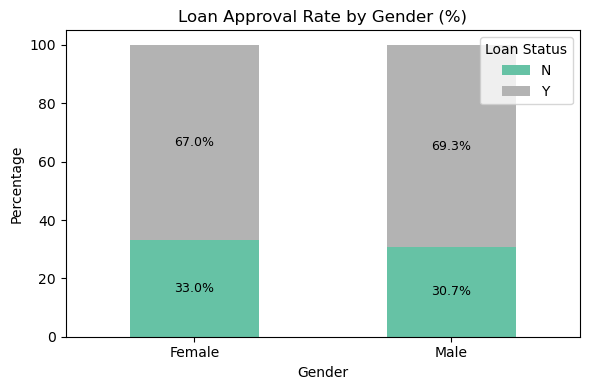

In [16]:
import matplotlib.pyplot as plt

# Create normalized percentage DataFrame
gender_approval = pd.crosstab(Loan_Lens_data_df['Gender'], Loan_Lens_data_df['Loan_Status'], normalize='index') * 100

# Plot stacked bar chart
ax = gender_approval.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')

plt.title('Loan Approval Rate by Gender (%)')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=0)

# Add percentage labels on bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:  # only label if bar segment has height
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()



##### Impact of credit history


Loan Approval Percentage by Credit History:

Loan_Status         N      Y
Credit_History              
0.0             92.13   7.87
1.0             20.42  79.58


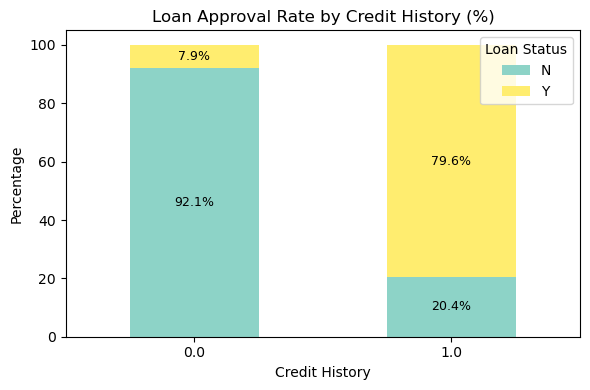

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crosstab of Credit History vs Loan Status, normalized by Credit History category to get percentages
credit_approval = pd.crosstab(
    Loan_Lens_data_df['Credit_History'], 
    Loan_Lens_data_df['Loan_Status'], 
    normalize='index'
) * 100

# Round for display
credit_approval_rounded = credit_approval.round(2)

# Print table
print("Loan Approval Percentage by Credit History:\n")
print(credit_approval_rounded)

# Plot stacked bar chart
ax = credit_approval.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set3')

plt.title('Loan Approval Rate by Credit History (%)')
plt.ylabel('Percentage')
plt.xlabel('Credit History')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=0)

# Add percentage labels on bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


In [18]:
#Applicants with good credit history (1.0) are much more likely to have their loan approved.
     #Approval  rate is very high (80%)

#Applicants with bad credit history (0.0) are rarely approved.
    #Approval rate is extremely low (10%)


#### Influence of marital status on loan approval

Loan Approval Percentage by Marital Status:

Loan_Status      N      Y
Married                  
No           37.09  62.91
Yes          28.39  71.61


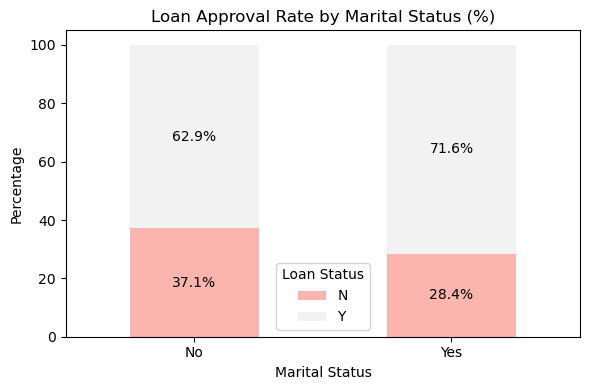

In [19]:
# Crosstab for Marital Status
married_approval = pd.crosstab(
    Loan_Lens_data_df['Married'], 
    Loan_Lens_data_df['Loan_Status'], 
    normalize='index'
) * 100

print("Loan Approval Percentage by Marital Status:\n")
print(married_approval.round(2))

# Plot
ax = married_approval.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Pastel1')
plt.title('Loan Approval Rate by Marital Status (%)')
plt.ylabel('Percentage')
plt.xlabel('Marital Status')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, p.get_y() + height/2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()


In [20]:
#Married people have a higher loan approval than un married people 

#### Influence of property area on loan approval

Loan Approval Percentage by Property Area:

Loan_Status        N      Y
Property_Area              
Rural          38.55  61.45
Semiurban      23.18  76.82
Urban          34.16  65.84


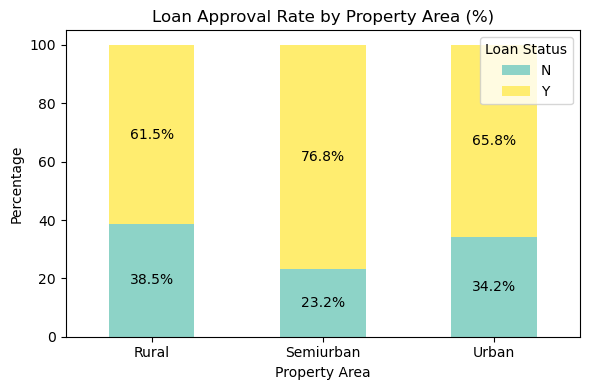

In [21]:
# Crosstab for Property Area
property_approval = pd.crosstab(
    Loan_Lens_data_df['Property_Area'], 
    Loan_Lens_data_df['Loan_Status'], 
    normalize='index'
) * 100

print("Loan Approval Percentage by Property Area:\n")
print(property_approval.round(2))

# Plot
ax = property_approval.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set3')
plt.title('Loan Approval Rate by Property Area (%)')
plt.ylabel('Percentage')
plt.xlabel('Property Area')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, p.get_y() + height/2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()


In [22]:
# Semiurban applicants have the highest loan approval rate (~77%).
# Urban applicants have moderate approval (~66%)
# Rural applicants have the lowest approval rate (~61.5%).

#### Influence of education on loan approval

Loan Approval Percentage by Education:

Loan_Status       N      Y
Education                 
Graduate      29.17  70.83
Not Graduate  38.81  61.19


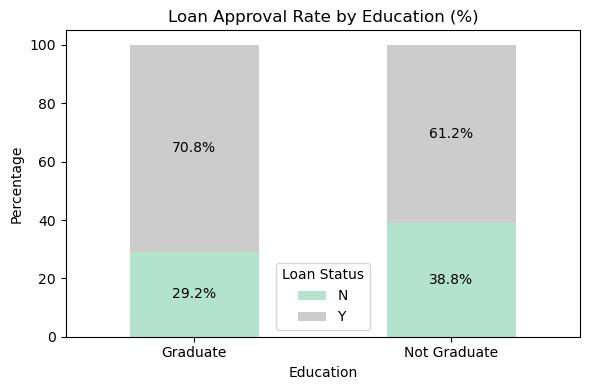

In [23]:
# Crosstab for Education
education_approval = pd.crosstab(
    Loan_Lens_data_df['Education'], 
    Loan_Lens_data_df['Loan_Status'], 
    normalize='index'
) * 100

print("Loan Approval Percentage by Education:\n")
print(education_approval.round(2))

# Plot
ax = education_approval.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Pastel2')
plt.title('Loan Approval Rate by Education (%)')
plt.ylabel('Percentage')
plt.xlabel('Education')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, p.get_y() + height/2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()


In [24]:
#Education level does have an impact on loan approval
#This suggests that graduates have a noticeably higher chance of getting loan approval compared to those who are not graduates

#### Most Common Loan Amount Terms

In [25]:
# Display the most common loan amount terms
common_terms = Loan_Lens_data_df['Loan_Amount_Term'].value_counts().sort_values(ascending=False)
print("Most Common Loan Amount Terms:")
common_terms


Most Common Loan Amount Terms:


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

#### Income Trends Among Approved And Unapproved Applicants.

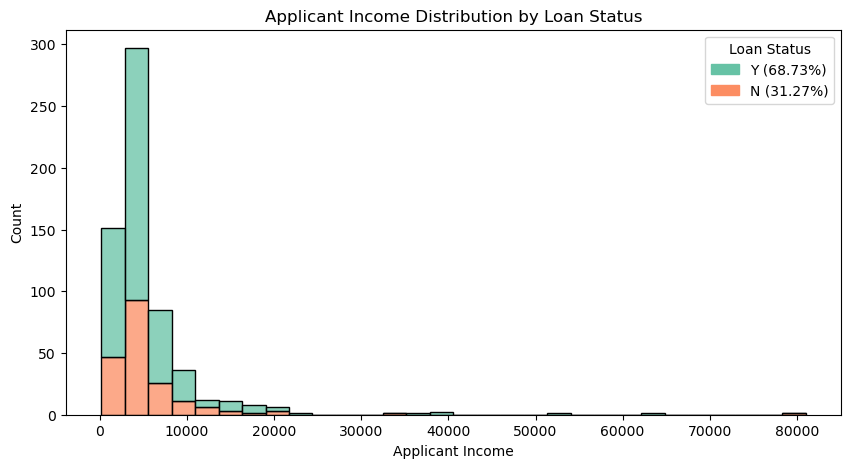

In [26]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10,5))

sns.histplot(
    data=Loan_Lens_data_df,
    x='ApplicantIncome',
    hue='Loan_Status',
    multiple='stack',
    bins=30,
    palette='Set2',
    legend=False  # disable automatic legend to create our own
)

plt.title('Applicant Income Distribution by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Count')

# Calculate percentages
total = len(Loan_Lens_data_df)
counts = Loan_Lens_data_df['Loan_Status'].value_counts()
percentages = (counts / total * 100).round(2)

# Manually create legend handles with percentages
unique_statuses = counts.index.tolist()
colors = sns.color_palette('Set2', n_colors=len(unique_statuses))

handles = []
labels = []

for status, color in zip(unique_statuses, colors):
    handles.append(mpatches.Patch(color=color))
    labels.append(f"{status} ({percentages[status]}%)")

plt.legend(handles=handles, labels=labels, title='Loan Status')

plt.show()


#### Loan Amount Trends Among Approved And Unapproved Applicants.

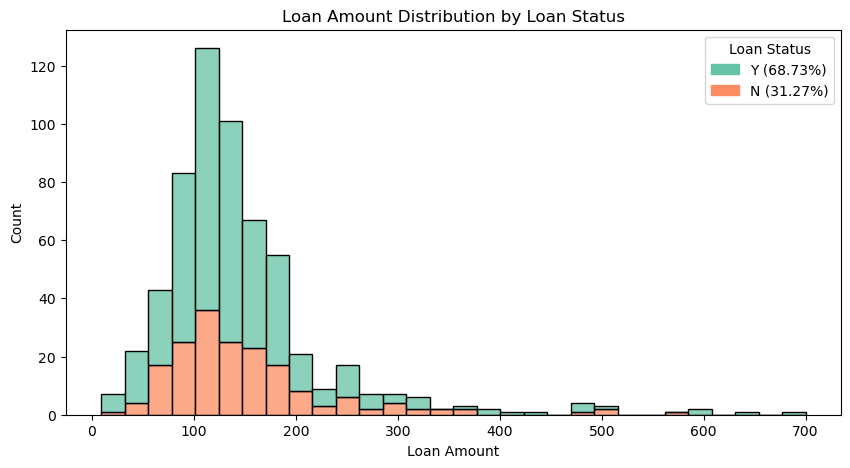

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

plt.figure(figsize=(10,5))

sns.histplot(
    data=Loan_Lens_data_df,
    x='LoanAmount',
    hue='Loan_Status',
    multiple='stack',
    bins=30,
    palette='Set2',
    legend=False  # We'll create a custom legend
)

plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

# Calculate percentages of each Loan_Status category
total = len(Loan_Lens_data_df)
counts = Loan_Lens_data_df['Loan_Status'].value_counts()
percentages = (counts / total * 100).round(2)

# Manually create legend handles with percentages
unique_statuses = counts.index.tolist()
colors = sns.color_palette('Set2', n_colors=len(unique_statuses))

handles = []
labels = []

for status, color in zip(unique_statuses, colors):
    handles.append(mpatches.Patch(color=color))
    labels.append(f"{status} ({percentages[status]}%)")

plt.legend(handles=handles, labels=labels, title='Loan Status')

plt.show()


# 2. Data Visualization

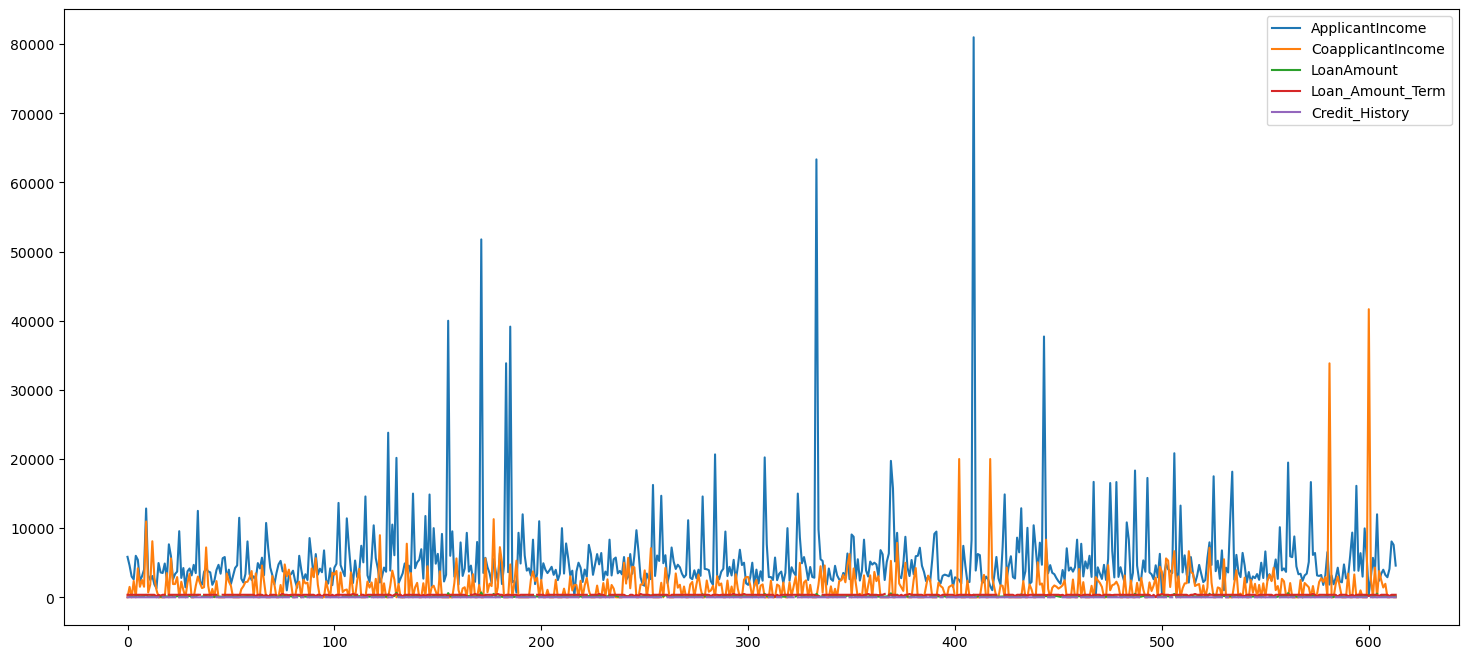

In [28]:
Loan_Lens_data_df.plot(figsize=(18, 8))
plt.show()

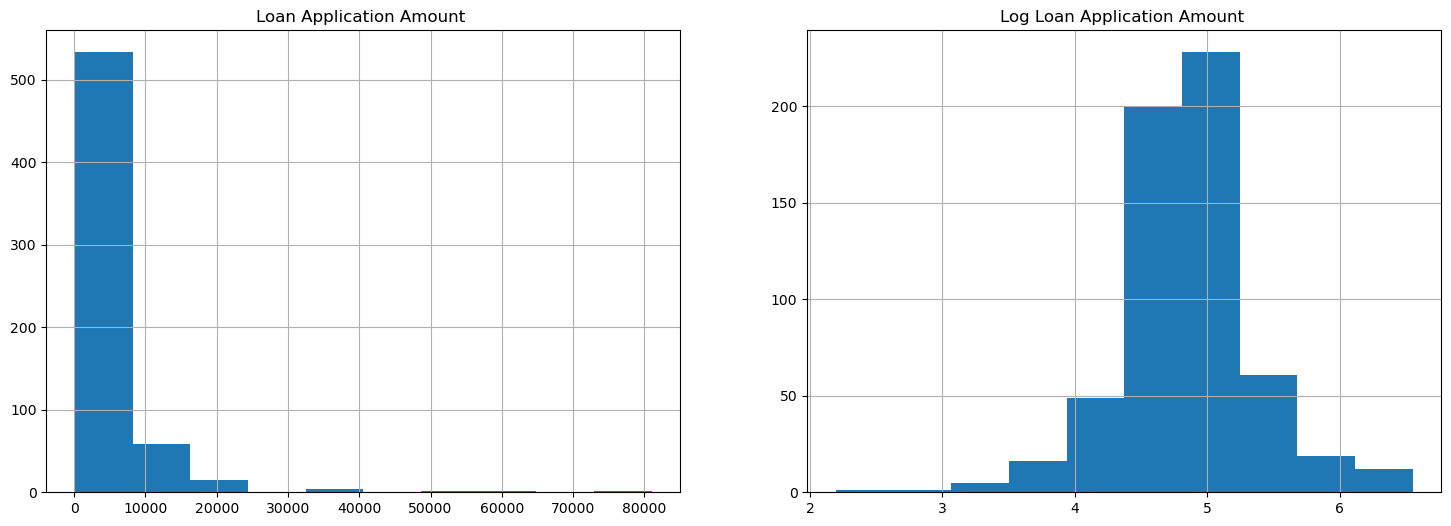

In [29]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


Loan_Lens_data_df['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(Loan_Lens_data_df['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

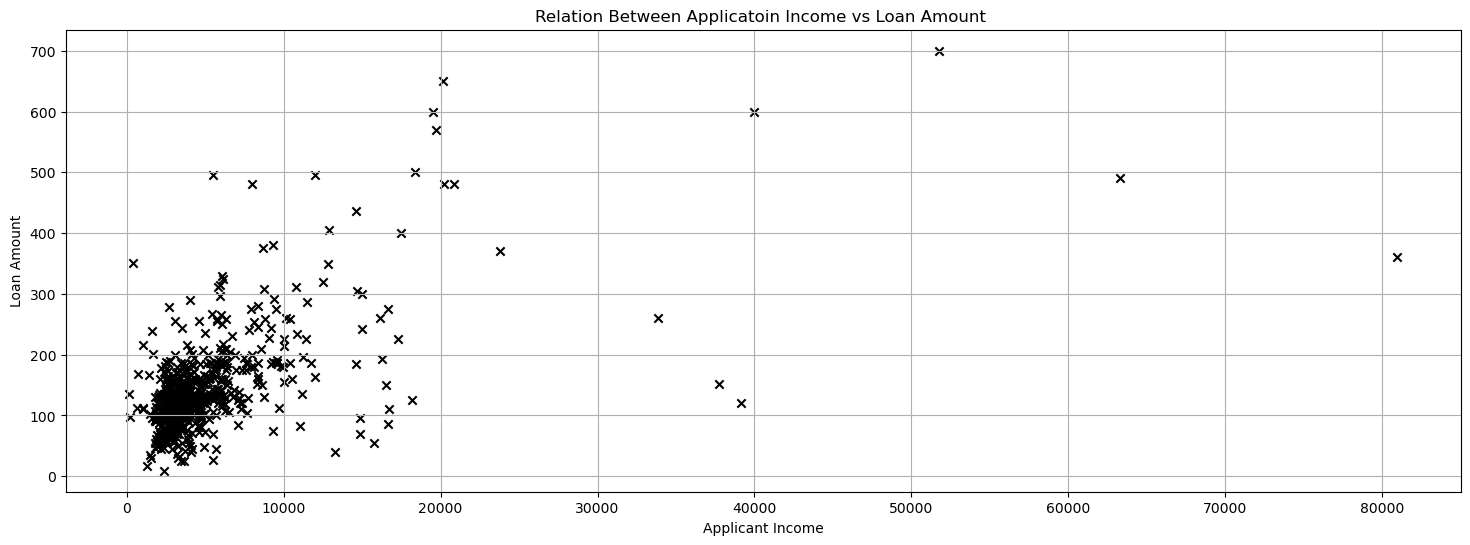

In [30]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(Loan_Lens_data_df['ApplicantIncome'] , Loan_Lens_data_df['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

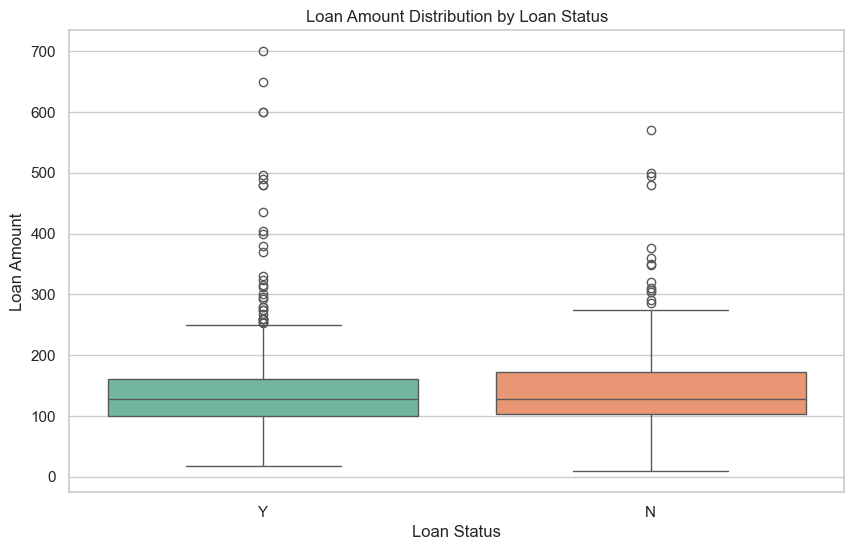

In [73]:
# This box plot shows the distribution of loan amounts for each loan status category (Approved vs. Not Approved),
# helping us visually compare median, quartiles, and detect potential outliers in loan amounts by approval decision.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=Loan_Lens_data_df,
    x='Loan_Status',
    y='LoanAmount',
    hue='Loan_Status',        # Add this
    palette='Set2',
    legend=False              # Optional: removes duplicate legend
)
plt.title("Loan Amount Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()


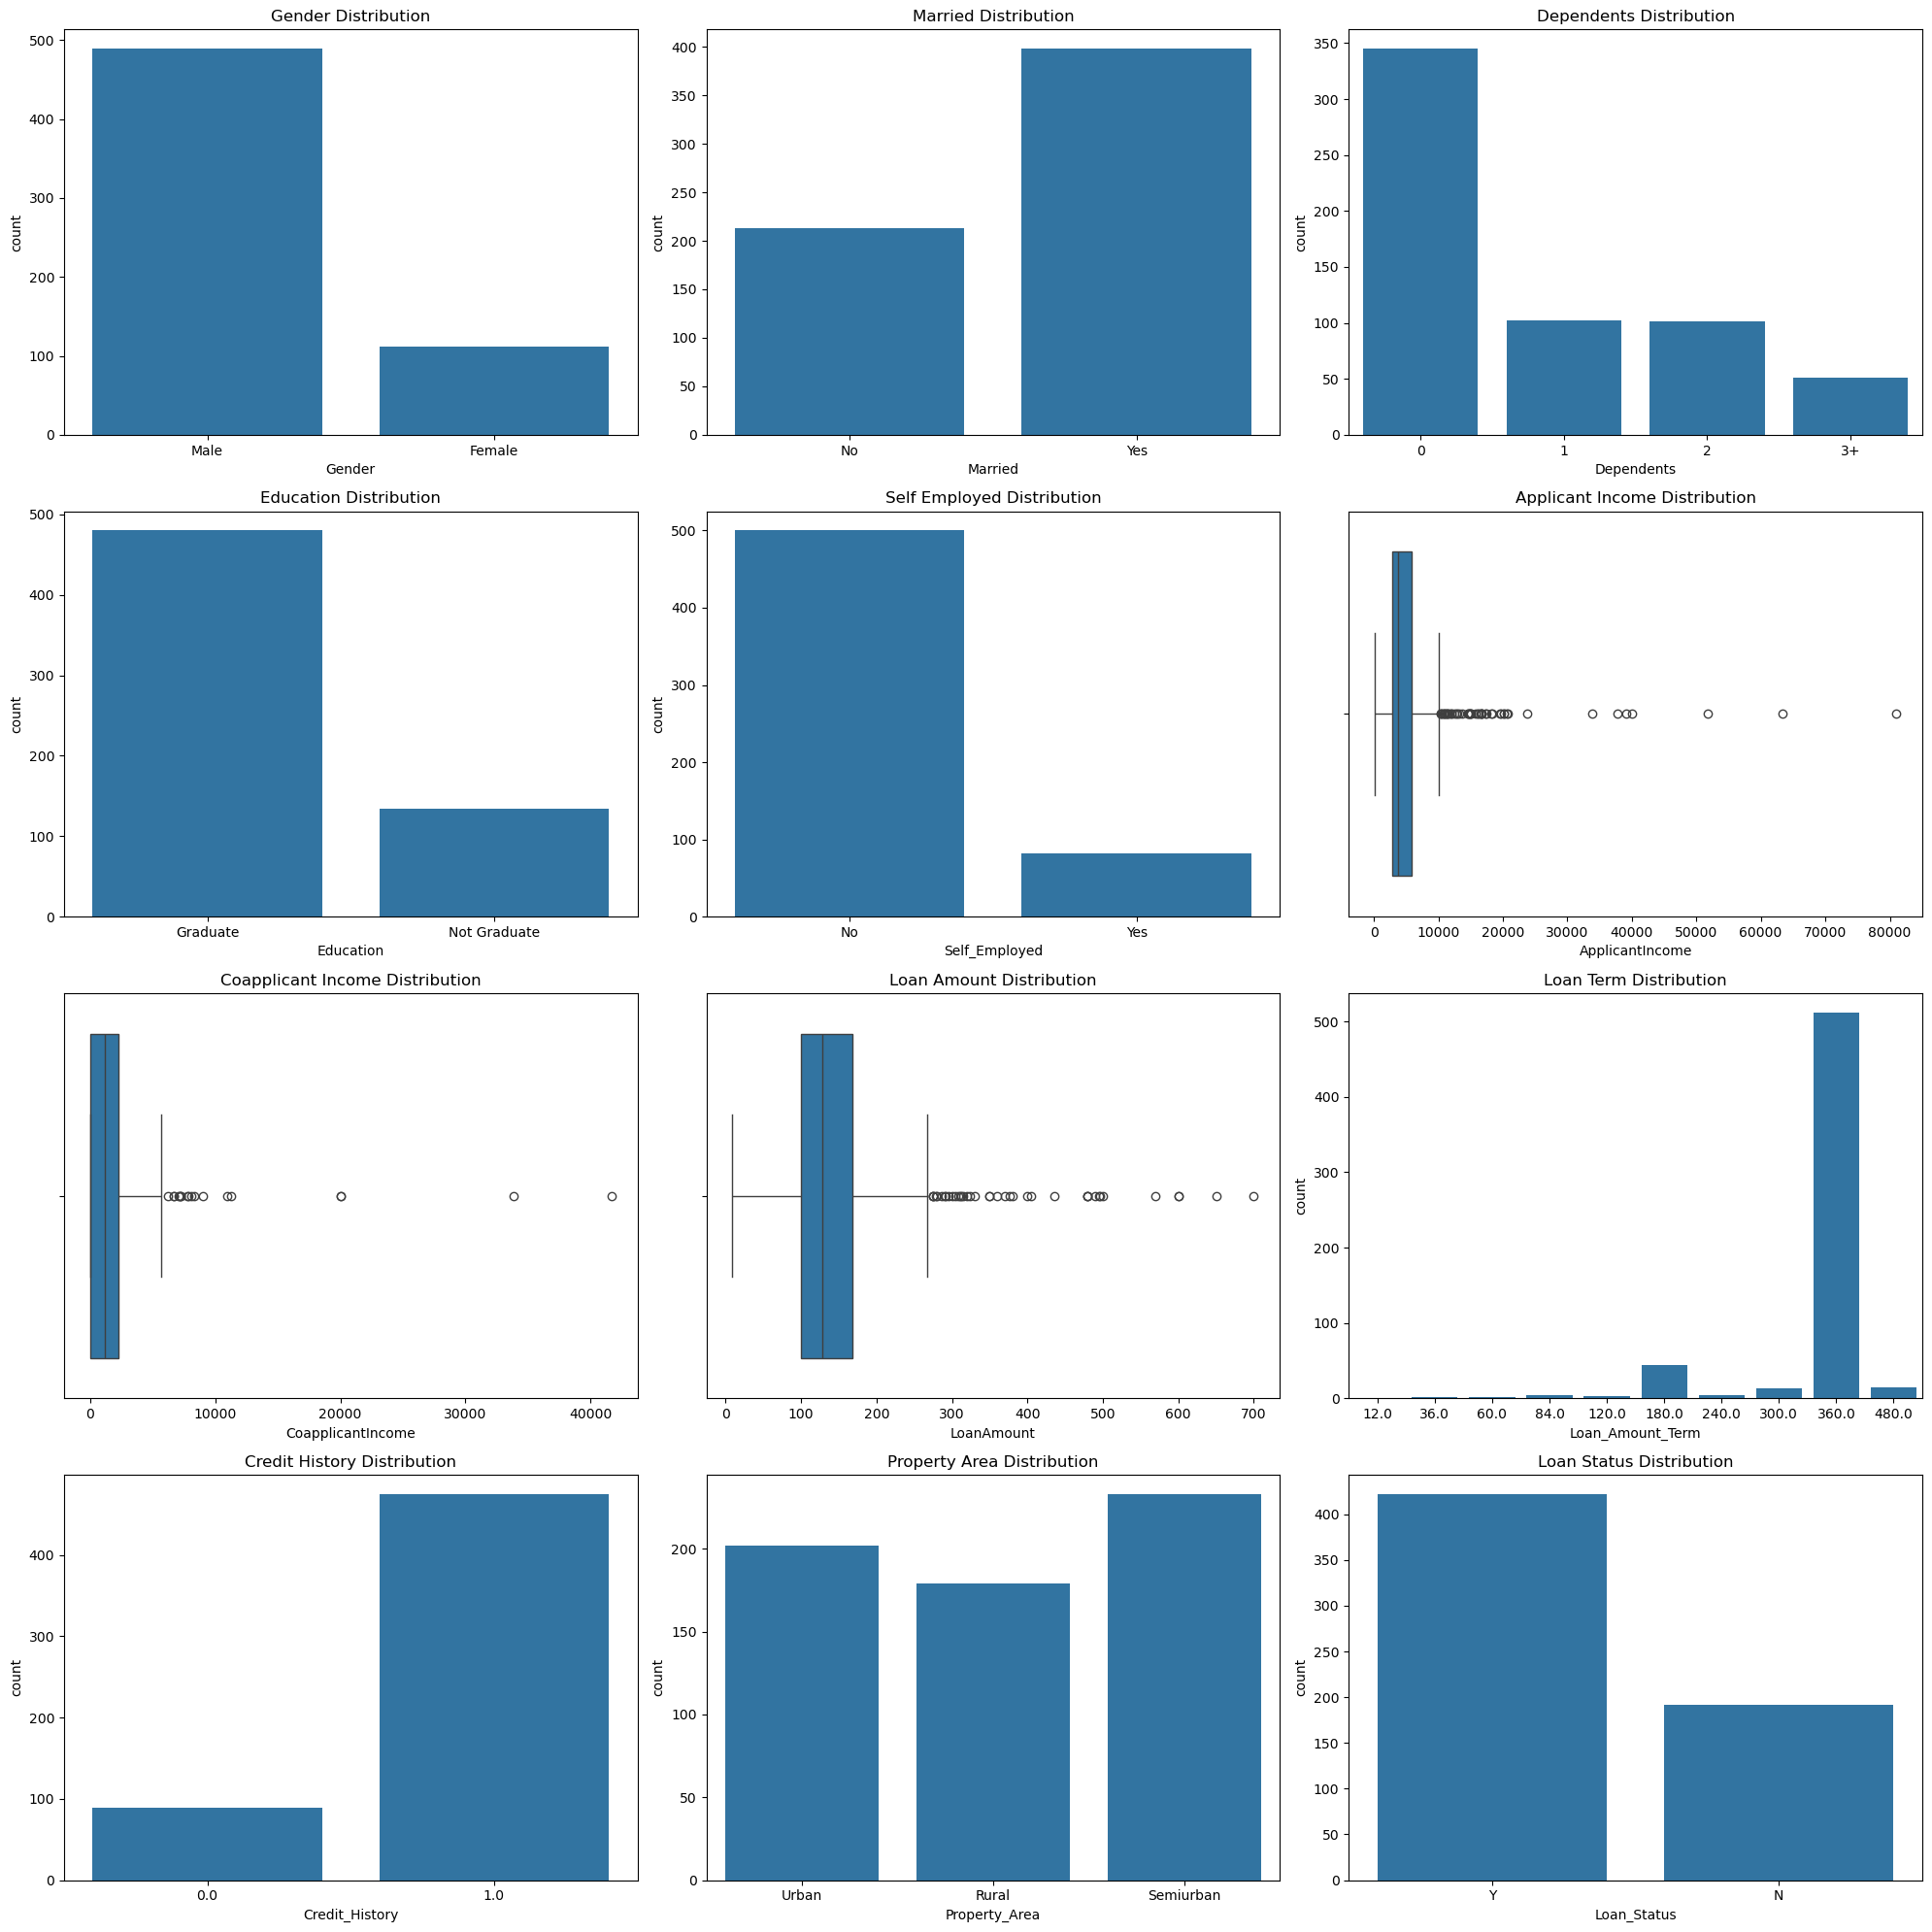

In [34]:
#show which value is dominating as per our dataset and distribution.
plt.figure(figsize=(20, 20))

# 1. Gender (Categorical)
plt.subplot(4, 3, 1)
sns.countplot(x='Gender', data=Loan_Lens_data_df)
plt.title('Gender Distribution')

# 2. Married (Categorical)
plt.subplot(4, 3, 2)
sns.countplot(x='Married', data=Loan_Lens_data_df)
plt.title('Married Distribution')

# 3. Dependents (Categorical)
plt.subplot(4, 3, 3)
sns.countplot(x='Dependents', data=Loan_Lens_data_df)
plt.title('Dependents Distribution')

# 4. Education (Categorical)
plt.subplot(4, 3, 4)
sns.countplot(x='Education', data=Loan_Lens_data_df)
plt.title('Education Distribution')

# 5. Self_Employed (Categorical)
plt.subplot(4, 3, 5)
sns.countplot(x='Self_Employed', data=Loan_Lens_data_df)
plt.title('Self Employed Distribution')

# 6. ApplicantIncome (Numerical)
plt.subplot(4, 3, 6)
sns.boxplot(x='ApplicantIncome', data=Loan_Lens_data_df)
plt.title('Applicant Income Distribution')

# 7. CoapplicantIncome (Numerical)
plt.subplot(4, 3, 7)
sns.boxplot(x='CoapplicantIncome', data=Loan_Lens_data_df)
plt.title('Coapplicant Income Distribution')

# 8. LoanAmount (Numerical)
plt.subplot(4, 3, 8)
sns.boxplot(x='LoanAmount', data=Loan_Lens_data_df)
plt.title('Loan Amount Distribution')

# 9. Loan_Amount_Term (Numerical)
plt.subplot(4, 3, 9)
sns.countplot(x='Loan_Amount_Term', data=Loan_Lens_data_df)
plt.title('Loan Term Distribution')


# 10. Credit_History (Categorical/Numerical-like)
plt.subplot(4, 3, 10)
sns.countplot(x='Credit_History', data=Loan_Lens_data_df)
plt.title('Credit History Distribution')

# 11. Property_Area (Categorical)
plt.subplot(4, 3, 11)
sns.countplot(x='Property_Area', data=Loan_Lens_data_df)
plt.title('Property Area Distribution')

# 12. Loan_Status (Target Variable)
plt.subplot(4, 3, 12)
sns.countplot(x='Loan_Status', data=Loan_Lens_data_df)
plt.title('Loan Status Distribution')

plt.tight_layout()
plt.show()


#### Heatmap of correlations

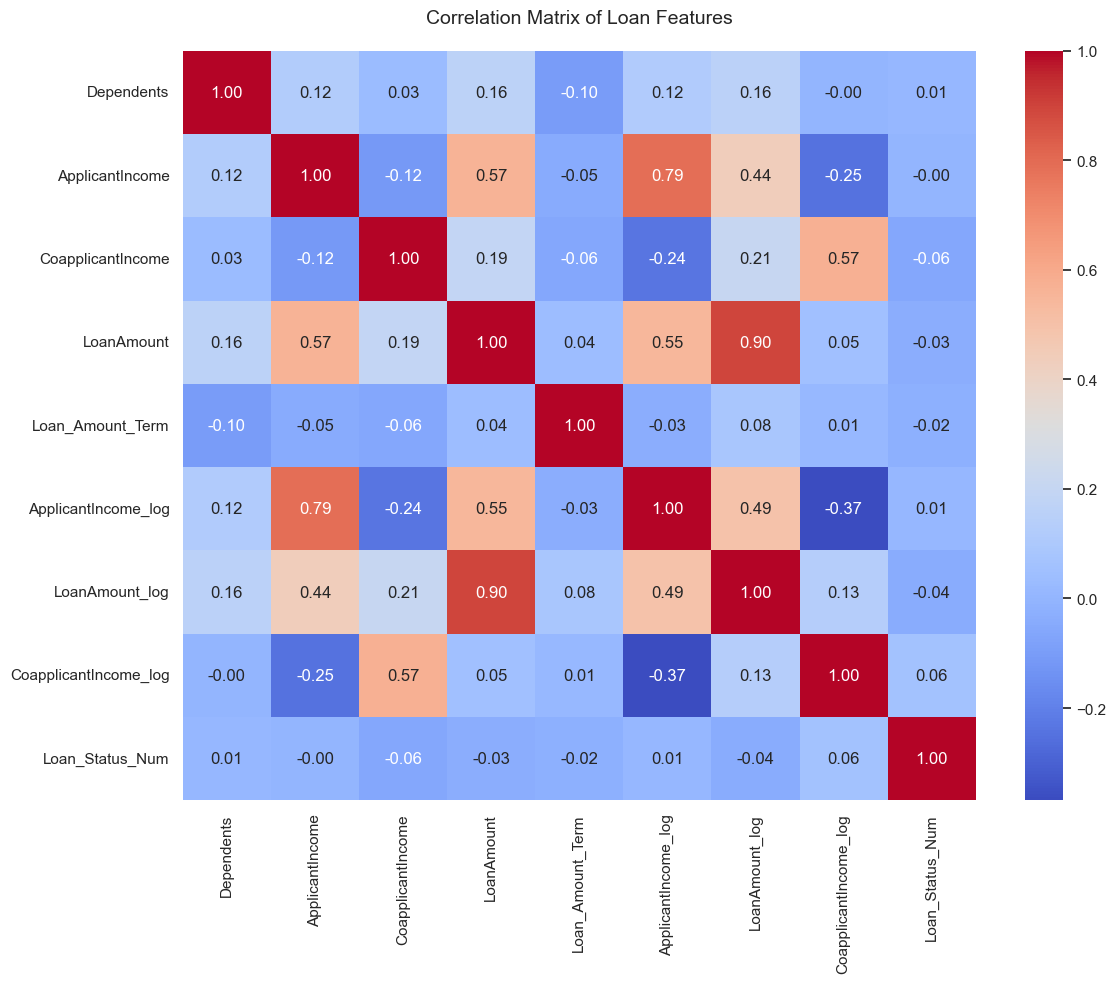

In [74]:
# 1. First ensure we have a clean copy of the data
df = Loan_Lens_data_df.copy()

# 2. Convert Loan_Status to numeric (Y=1, N=0)
df['Loan_Status_Num'] = df['Loan_Status'].map({'Y': 1, 'N': 0})#Temporarily convert the data into numerical

# 3. Select only numerical features (including our new encoded target)
num_vars = df.select_dtypes(include=['int64','float64'])

# 4. Calculate correlation matrix
corr_matrix = num_vars.corr()

# 5. Plot the correlation matrix
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
heatmap = sns.heatmap(corr_matrix, 
                     annot=True, 
                     fmt=".2f", 
                     cmap="coolwarm",
                     # center=0,
                     # vmin=-1,
                     # vmax=1,
                     # annot_kws={'size': 9}
                     )
plt.title("Correlation Matrix of Loan Features", pad=20, fontsize=14)
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Data Cleaning & Preprocessing

In [36]:
#Dropping irrelevant column 
Loan_Lens_data_df.drop('Loan_ID', axis=1, inplace=True)


### 4.1. Handling Missing values

In [37]:
# Check the number of missing values in each column of the DataFrame
Loan_Lens_data_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### 4.1.1. Checking for outliers to know the best method for imputation

In [38]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"\n{column} Outlier Summary:")
    print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"Lower bound = {lower_bound}, Upper bound = {upper_bound}")
    print(f"Number of outliers: {len(outliers)}")
    
    return outliers

# Loop through all numeric columns and apply the IQR function
numeric_cols = Loan_Lens_data_df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    outliers = detect_outliers_iqr(Loan_Lens_data_df, col)


ApplicantIncome Outlier Summary:
Q1 = 2877.5, Q3 = 5795.0, IQR = 2917.5
Lower bound = -1498.75, Upper bound = 10171.25
Number of outliers: 50

CoapplicantIncome Outlier Summary:
Q1 = 0.0, Q3 = 2297.25, IQR = 2297.25
Lower bound = -3445.875, Upper bound = 5743.125
Number of outliers: 18

LoanAmount Outlier Summary:
Q1 = 100.0, Q3 = 168.0, IQR = 68.0
Lower bound = -2.0, Upper bound = 270.0
Number of outliers: 39

Loan_Amount_Term Outlier Summary:
Q1 = 360.0, Q3 = 360.0, IQR = 0.0
Lower bound = 360.0, Upper bound = 360.0
Number of outliers: 88

Credit_History Outlier Summary:
Q1 = 1.0, Q3 = 1.0, IQR = 0.0
Lower bound = 1.0, Upper bound = 1.0
Number of outliers: 89


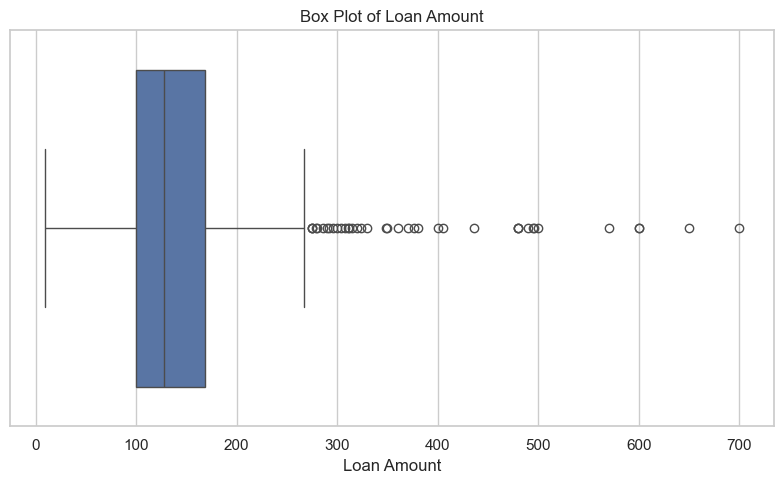

In [39]:
# Box plot to visualize the distribution and skewness of the LoanAmount feature.

# This helps determine whether to use mean or median for imputing missing values

# Set style
sns.set(style="whitegrid")
# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=Loan_Lens_data_df['LoanAmount'])
plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount')

plt.tight_layout()
plt.show()

In [40]:
# Filling missing value in LoanAmount Column

# I used the median to fill the missing values because, as shown in the box plot,
# the data contains many outliers (39). The mean would be skewed by these extreme values,
# while the median provides a more robust and accurate measure of central tendency in this case.

Loan_Lens_data_df['LoanAmount'] = Loan_Lens_data_df['LoanAmount'].fillna(Loan_Lens_data_df['LoanAmount'].median())


In [41]:
# Filling missing value in Loan_Amount_Term   Column

# I used the mode to fill missing values in Loan_Amount_Term because it is a categorical numeric feature 
# with a limited set of common values (e.g., 360, 120 months). 
# The mode represents the most frequent loan term in the dataset, 
# and using it maintains consistency with typical loan durations.
# Mean or median are not appropriate here since they may produce non-standard term values 
# that don't reflect real-world loan products
Loan_Lens_data_df['Loan_Amount_Term'] = Loan_Lens_data_df['Loan_Amount_Term'].fillna(Loan_Lens_data_df['Loan_Amount_Term'].mode()[0])



In [42]:
# Filling missing value in Credit History Column

# I filled missing values in Credit_History with 'Unknown' because the nulls might indicate 
# applicants who have never taken a loan before or lack a credit record in the system.
# This missingness could carry meaningful information about their creditworthiness or risk level,
# so preserving it as a separate category allows the model to learn from this distinct group.
Loan_Lens_data_df['Credit_History'] = Loan_Lens_data_df['Credit_History'].fillna('Unknown')

In [43]:
#filling missing value in Dependents column

# I used the median to fill missing values in the Dependents column because it provides a stable 
# imputation method for this discrete numeric feature. I avoided using the mode because it would have 
# replaced the missing values with 0, assuming applicants had no dependents, which introduces false certainty 
# and could bias the model,especially if they actually had dependents. I also avoided using the mean because 
# Dependents is a count-based feature, and the mean could produce unrealistic float values like 1.43, which are 
# not valid since one cannot have a fraction of a dependent. Using floats here would misrepresent the data unless 
# rounded, which adds unnecessary distortion. Since the missing values are minimal (about 2%), using 'Unknown' 
# was not appropriate, as it would unnecessarily introduce a new category and reduce the clarity of the feature. 
# The median is the best choice it reflects the typical number of dependents without being skewed by rare high 
# values, making the imputation both representative and robust.

# Replace '3+' with '3'
Loan_Lens_data_df['Dependents'] = Loan_Lens_data_df['Dependents'].replace('3+', '3')
#  Convert to float 
Loan_Lens_data_df['Dependents'] =  Loan_Lens_data_df['Dependents'].astype(float) 
# Filling missing values in Dependents column with mode
Loan_Lens_data_df['Dependents'] = Loan_Lens_data_df['Dependents'].fillna(Loan_Lens_data_df['Dependents'].median()) 



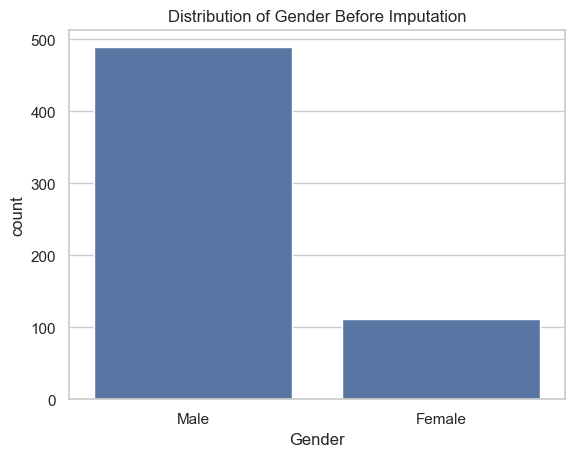

In [44]:
# Visualize the count of each gender category before imputing missing values

sns.countplot(x='Gender', data=Loan_Lens_data_df)
plt.title("Distribution of Gender Before Imputation")
plt.xlabel("Gender")
plt.show()

In [45]:
# Filling missing value in Gender Column

# I used the mode to fill missing values in the Gender column because it is a categorical feature 
# with limited values (e.g., 'Male' or 'Female'). The mode, which is 'Male' in this case, 
# represents the most frequent gender in the dataset
# Filling missing values with the mode helps maintain data consistency and avoids introducing unknown categories

Loan_Lens_data_df['Gender'] = Loan_Lens_data_df['Gender'].fillna(Loan_Lens_data_df['Gender'].mode()[0])


In [46]:
# Filling missing value in Married Column

# I used the mode to fill missing values in the Married column because it is a categorical feature 
# with limited possible values (e.g., 'Yes' or 'No'). The mode reflects the most common marital status 
# in the dataset, making it a reasonable and statistically sound choice. This approach ensures that 
# imputed values remain realistic and consistent with the majority of the data.

Loan_Lens_data_df['Married'] = Loan_Lens_data_df['Married'].fillna(Loan_Lens_data_df['Married'].mode()[0])


In [47]:
# Filling missing value in Self employed Column

# I used the mode to fill missing values in the Self_Employed column because it is a categorical variable 
# with only a few possible values (e.g., 'Yes' or 'No'). The mode represents the most common employment status,
# making it a logical and consistent choice. Using mode avoids introducing unrealistic or unknown categories
# and helps preserve the original distribution of the data.
Loan_Lens_data_df['Self_Employed'] = Loan_Lens_data_df['Self_Employed'].fillna(Loan_Lens_data_df['Self_Employed'].mode()[0])


In [48]:
Loan_Lens_data_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Checking For Outliers And Data Inconsistencies.

In [49]:

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"\n{column} Outlier Summary:")
    print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"Lower bound = {lower_bound}, Upper bound = {upper_bound}")
    print(f"Number of outliers: {len(outliers)}")
    
    return outliers

# Loop through all numeric columns and apply the IQR function
numeric_cols = Loan_Lens_data_df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    outliers = detect_outliers_iqr(Loan_Lens_data_df, col)



Dependents Outlier Summary:
Q1 = 0.0, Q3 = 1.0, IQR = 1.0
Lower bound = -1.5, Upper bound = 2.5
Number of outliers: 51

ApplicantIncome Outlier Summary:
Q1 = 2877.5, Q3 = 5795.0, IQR = 2917.5
Lower bound = -1498.75, Upper bound = 10171.25
Number of outliers: 50

CoapplicantIncome Outlier Summary:
Q1 = 0.0, Q3 = 2297.25, IQR = 2297.25
Lower bound = -3445.875, Upper bound = 5743.125
Number of outliers: 18

LoanAmount Outlier Summary:
Q1 = 100.25, Q3 = 164.75, IQR = 64.5
Lower bound = 3.5, Upper bound = 261.5
Number of outliers: 41

Loan_Amount_Term Outlier Summary:
Q1 = 360.0, Q3 = 360.0, IQR = 0.0
Lower bound = 360.0, Upper bound = 360.0
Number of outliers: 88


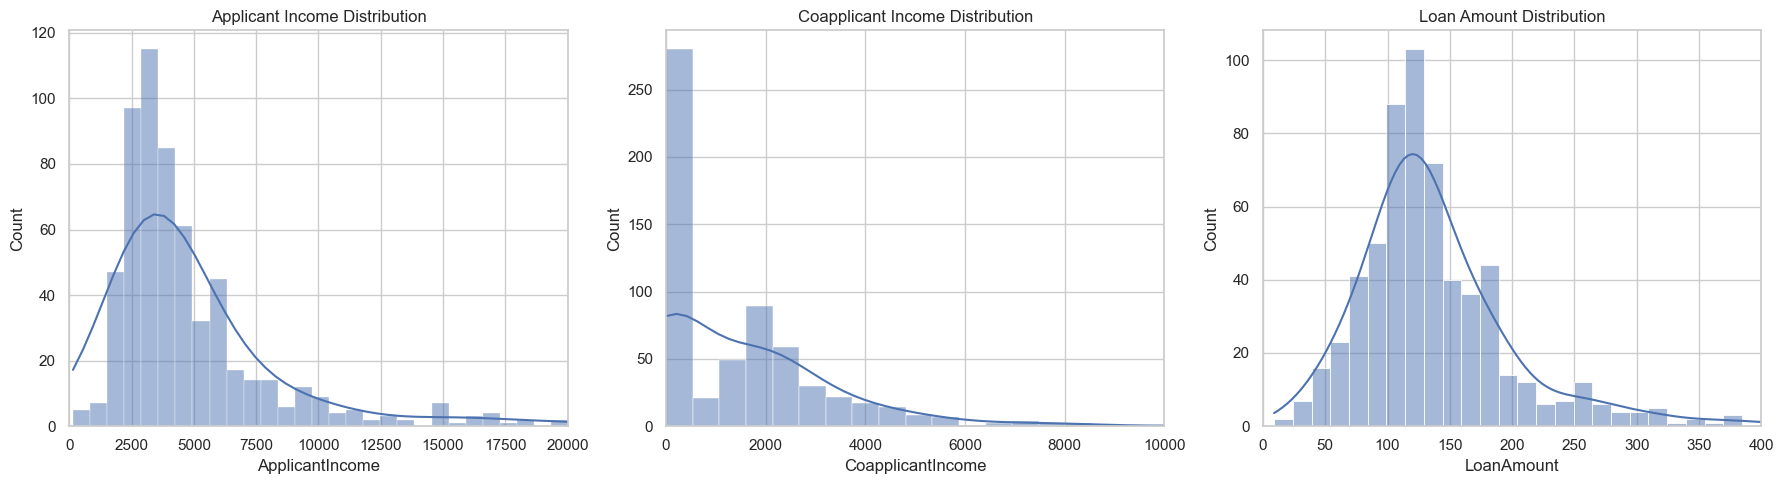

In [50]:
#Checking the skew to know which method we are going to use to solve the outliers

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: ApplicantIncome (Zoomed in to 0–20,000)
sns.histplot(Loan_Lens_data_df["ApplicantIncome"], kde=True, ax=axes[0])
axes[0].set_title('Applicant Income Distribution')
axes[0].set_xlim(0, 20000)

# Plot 2: CoapplicantIncome (Zoomed in to 0–10,000)
sns.histplot(Loan_Lens_data_df["CoapplicantIncome"], kde=True, ax=axes[1])
axes[1].set_title('Coapplicant Income Distribution')
axes[1].set_xlim(0, 10000)

# Plot 3: LoanAmount (Zoomed in to 0–400)
sns.histplot(Loan_Lens_data_df["LoanAmount"], kde=True, ax=axes[2])
axes[2].set_title('Loan Amount Distribution')
axes[2].set_xlim(0, 400)

plt.tight_layout()
plt.show()


In [51]:
skewness = Loan_Lens_data_df.select_dtypes(include=['number']).skew()
print(skewness)


Dependents           1.015551
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
dtype: float64


In [52]:

# ApplicantIncome had a skew of 6.54, indicating a highly positive skew.
# To reduce skewness and normalize the distribution, a log transformation (log1p) was applied.
# This is effective for compressing large values and handling outliers in positively skewed data.
 
Loan_Lens_data_df['ApplicantIncome_log'] = np.log1p(Loan_Lens_data_df['ApplicantIncome'])


In [53]:

# LoanAmount had a skew of 2.74, indicating a highly positive skew.
# To correct the distribution and reduce the impact of extreme values,
# a log1p transformation was applied. This helps in stabilizing variance
# and making the data more suitable for machine learning models.
Loan_Lens_data_df['LoanAmount_log'] = np.log1p(Loan_Lens_data_df['LoanAmount'])


In [54]:

# CoapplicantIncome had a skew of 7.49, indicating extremely high positive skewness.
# A log1p transformation was applied to compress large values, reduce skewness,
# and make the distribution more suitable for machine learning algorithms.
Loan_Lens_data_df['CoapplicantIncome_log'] = np.log1p(Loan_Lens_data_df['CoapplicantIncome'])


In [55]:
#Skewness ≈ 0 → roughly symmetric (normal)
#Skewness > +1 → highly positively skewed (long right tail)
#Skewness < -1 → highly negatively skewed (long left tail)
#Between -0.5 and +0.5 → approximately symmetric
skewness = Loan_Lens_data_df.select_dtypes(include=['number']).skew()
print(skewness)


Dependents               1.015551
ApplicantIncome          6.539513
CoapplicantIncome        7.491531
LoanAmount               2.743053
Loan_Amount_Term        -2.402112
ApplicantIncome_log      0.482128
LoanAmount_log          -0.151578
CoapplicantIncome_log   -0.173073
dtype: float64


In [56]:
Loan_Lens_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 614 non-null    object 
 1   Married                614 non-null    object 
 2   Dependents             614 non-null    float64
 3   Education              614 non-null    object 
 4   Self_Employed          614 non-null    object 
 5   ApplicantIncome        614 non-null    int64  
 6   CoapplicantIncome      614 non-null    float64
 7   LoanAmount             614 non-null    float64
 8   Loan_Amount_Term       614 non-null    float64
 9   Credit_History         614 non-null    object 
 10  Property_Area          614 non-null    object 
 11  Loan_Status            614 non-null    object 
 12  ApplicantIncome_log    614 non-null    float64
 13  LoanAmount_log         614 non-null    float64
 14  CoapplicantIncome_log  614 non-null    float64
dtypes: flo

### Encoding

In [57]:
# Applying one-hot encoding to nominal categorical columns so the model can interpret them numerically
Loan_Lens_data_df= pd.get_dummies(Loan_Lens_data_df, columns=[   #automatically creates new binary (0/1) columns for each category.
    'Gender', 
    'Married', 
    'Self_Employed', 
    'Property_Area', 
    'Credit_History'
 ],dtype=int)


In [58]:
# Create dummies for Loan_Status but don't drop original column
loan_status_dummies = pd.get_dummies(Loan_Lens_data_df['Loan_Status'], prefix='Loan_Status', drop_first=False, dtype=int)

# Concatenate the dummies to the original dataframe
Loan_Lens_data_df = pd.concat([Loan_Lens_data_df, loan_status_dummies], axis=1)


In [59]:

# Since Label Encoder by default assigns labels alphabetically (e.g., 'Graduate' = 0 and 'Not Graduate' = 1) we first map the values to (e.g., 'B_Graduate' = 0 and 'A_Not Graduate')
Loan_Lens_data_df['Education'] = Loan_Lens_data_df['Education'].map({
    'Graduate': 'B_Graduate',
    'Not Graduate': 'A_Not Graduate'
})
lbl_encoder = LabelEncoder()
Loan_Lens_data_df['Education'] = lbl_encoder.fit_transform(Loan_Lens_data_df['Education'])
Loan_Lens_data_df


,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,ApplicantIncome_log,LoanAmount_log,CoapplicantIncome_log,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,Credit_History_1.0,Credit_History_Unknown,Loan_Status_N,Loan_Status_Y
0,0.0,1,5849,0.0,128.0,360.0,Y,8.674197,4.859812,0.000000,...,1,0,0,0,1,0,1,0,0,1
1,1.0,1,4583,1508.0,128.0,360.0,N,8.430327,4.859812,7.319202,...,1,0,1,0,0,0,1,0,1,0
2,0.0,1,3000,0.0,66.0,360.0,Y,8.006701,4.204693,0.000000,...,0,1,0,0,1,0,1,0,0,1
3,0.0,0,2583,2358.0,120.0,360.0,Y,7.857094,4.795791,7.765993,...,1,0,0,0,1,0,1,0,0,1
4,0.0,1,6000,0.0,141.0,360.0,Y,8.699681,4.955827,0.000000,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,1,2900,0.0,71.0,360.0,Y,7.972811,4.276666,0.000000,...,1,0,1,0,0,0,1,0,0,1
610,3.0,1,4106,0.0,40.0,180.0,Y,8.320448,3.713572,0.000000,...,1,0,1,0,0,0,1,0,0,1
611,1.0,1,8072,240.0,253.0,360.0,Y,8.996280,5.537334,5.484797,...,1,0,0,0,1,0,1,0,0,1
612,2.0,1,7583,0.0,187.0,360.0,Y,8.933796,5.236442,0.000000,...,1,0,0,0,1,0,1,0,0,1


In [60]:
#Checking if it has encoded
Loan_Lens_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   Education                614 non-null    int32  
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Loan_Status              614 non-null    object 
 7   ApplicantIncome_log      614 non-null    float64
 8   LoanAmount_log           614 non-null    float64
 9   CoapplicantIncome_log    614 non-null    float64
 10  Gender_Female            614 non-null    int32  
 11  Gender_Male              614 non-null    int32  
 12  Married_No               614 non-null    int32  
 13  Married_Yes              614 non-null    int32  
 14  Self_Employed_No         6

#### Heatmap of correlations

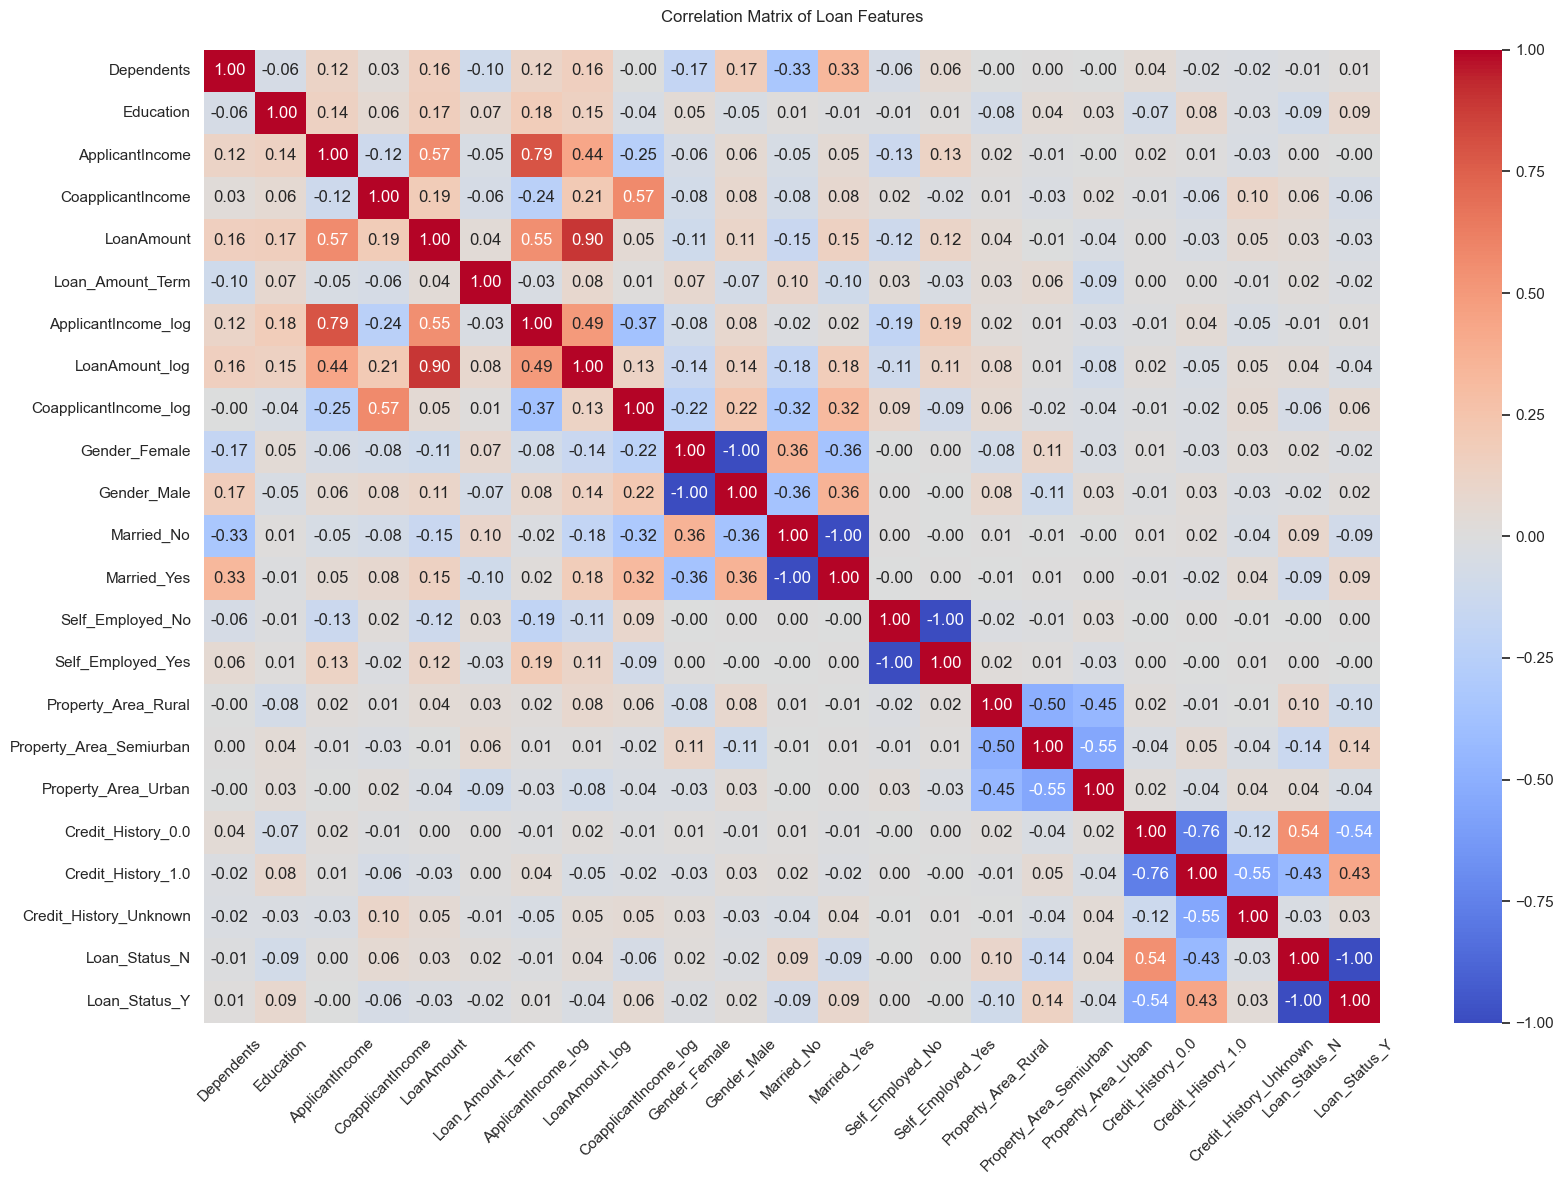

In [61]:
# Select numerical variables (including encoded categoricals)
num_vars =  Loan_Lens_data_df.select_dtypes(include=['int','float']) #which is basically all columns

# Create correlation matrix with Loan_Status (assuming it's encoded as 0/1)
corr_matrix = num_vars.corr()

# # Plot heatmap
plt.figure(figsize=(17,12))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            center=0,)
plt.title("Correlation Matrix of Loan Features", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [62]:
target_corr = corr_matrix["Loan_Status_Y"].sort_values(ascending=False)
print(target_corr)


Loan_Status_Y              1.000000
Credit_History_1.0         0.432616
Property_Area_Semiurban    0.136540
Married_Yes                0.091478
Education                  0.085884
CoapplicantIncome_log      0.060593
Credit_History_Unknown     0.033849
Gender_Male                0.017987
ApplicantIncome_log        0.010959
Dependents                 0.010118
Self_Employed_No           0.003700
Self_Employed_Yes         -0.003700
ApplicantIncome           -0.004710
Gender_Female             -0.017987
Loan_Amount_Term          -0.022549
LoanAmount                -0.033214
LoanAmount_log            -0.038242
Property_Area_Urban       -0.043621
CoapplicantIncome         -0.059187
Married_No                -0.091478
Property_Area_Rural       -0.100694
Credit_History_0.0        -0.540556
Loan_Status_N             -1.000000
Name: Loan_Status_Y, dtype: float64


# Model Building

## Split the data into training and test sets.

In [63]:
from sklearn.model_selection import train_test_split

# Define features X and target y
X = Loan_Lens_data_df.drop(columns=['Loan_Status', 'Loan_Status_Y', 'Loan_Status_N'])  # drop original and redundant targets
y = Loan_Lens_data_df['Loan_Status_Y']  # target

# Split data (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,   # 20% test size
    random_state=42, # for reproducibility
    stratify=y       # keep class distribution in train and test
)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')


Training set size: 491 samples
Test set size: 123 samples


## Logistic Regression

Accuracy: 0.8618

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

Confusion Matrix:
[[22 16]
 [ 1 84]]


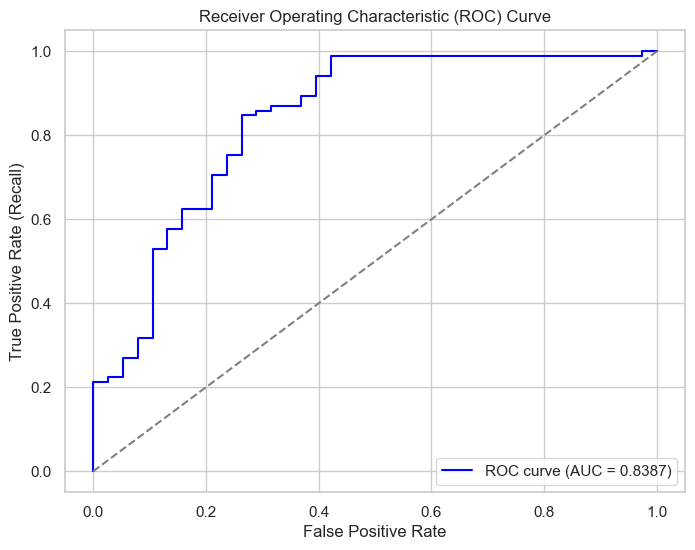

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Create a pipeline with scaler and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Step 1: scale features
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))  # Step 2: logistic regression
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # probability for positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.show()


## Decision Tree

Decision Tree Performance:
Accuracy: 0.7480
              precision    recall  f1-score   support

           0       0.58      0.68      0.63        38
           1       0.85      0.78      0.81        85

    accuracy                           0.75       123
   macro avg       0.71      0.73      0.72       123
weighted avg       0.76      0.75      0.75       123

Confusion Matrix:
[[26 12]
 [19 66]]


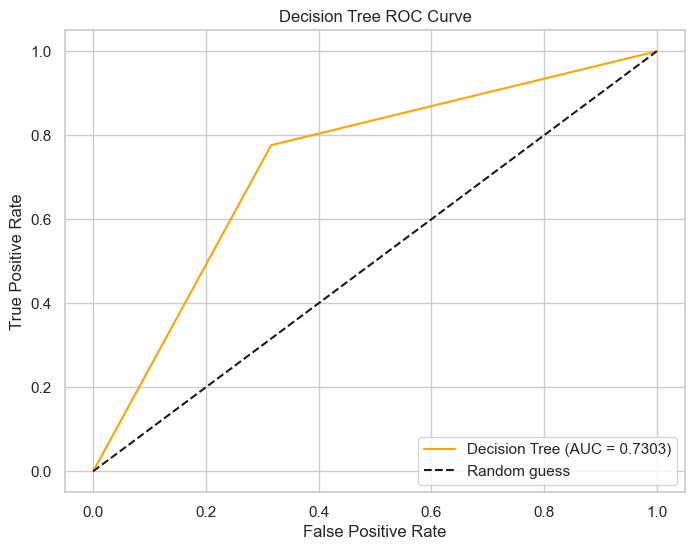

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Train Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_clf.predict(X_test)
y_pred_proba_dt = dt_clf.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.title('Decision Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


## Random Forest

Random Forest Performance:
Accuracy: 0.8537
              precision    recall  f1-score   support

           0       0.83      0.66      0.74        38
           1       0.86      0.94      0.90        85

    accuracy                           0.85       123
   macro avg       0.85      0.80      0.82       123
weighted avg       0.85      0.85      0.85       123

Confusion Matrix:
[[25 13]
 [ 5 80]]


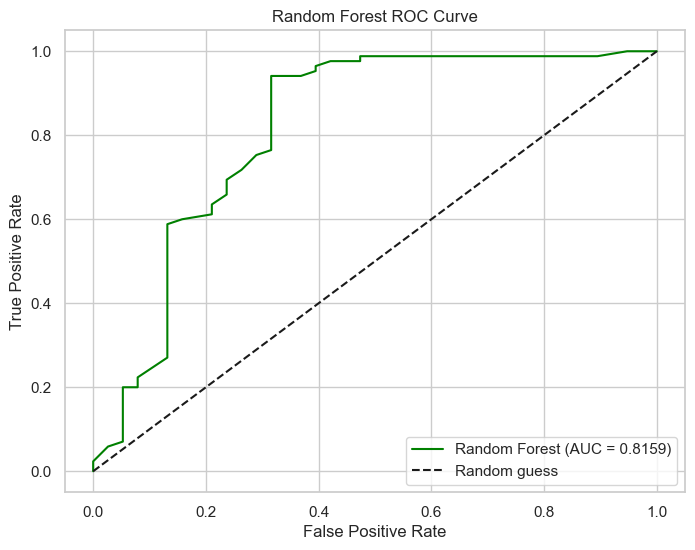

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Train Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# Deployment 

In [70]:

import pickle

# After your training and pipeline fitting:
# pipeline.fit(X_train, y_train)

# Save the model pipeline
with open('logistic_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# Save the training feature columns (important to keep order!)
with open('model_columns.pkl', 'wb') as f:
    pickle.dump(X_train.columns.tolist(), f)

print("Model and feature columns saved!")



Model and feature columns saved!


In [71]:
import pickle
import pandas as pd

# 1. Load your saved pipeline model
with open('logistic_pipeline.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# 2. Load the saved feature columns (order matters!)
with open('model_columns.pkl', 'rb') as f:
    model_columns = pickle.load(f)

# 3. Prepare input data dictionary (with your actual log values)
input_dict = {
    'Dependents': 0,
    'Education': 1,
    'ApplicantIncome': 4500,
    'CoapplicantIncome': 0.0,
    'LoanAmount': 128.0,
    'Loan_Amount_Term': 360.0,
    'ApplicantIncome_log': 8.41,     # your precomputed log
    'LoanAmount_log': 4.85,          # your precomputed log
    'CoapplicantIncome_log': 0.0,    # your precomputed log
    'Gender_Female': 0,
    'Gender_Male': 1,
    'Married_No': 0,
    'Married_Yes': 1,
    'Self_Employed_No': 1,
    'Self_Employed_Yes': 0,
    'Property_Area_Rural': 0,
    'Property_Area_Semiurban': 0,
    'Property_Area_Urban': 1,
    'Credit_History_0.0': 0,
    'Credit_History_1.0': 1,
    'Credit_History_Unknown': 0
}

# 4. Fill any missing features with 0 to avoid NaNs
input_dict_complete = {col: input_dict.get(col, 0) for col in model_columns}

# 5. Convert to DataFrame with correct column order
X_new = pd.DataFrame([input_dict_complete], columns=model_columns)

# 6. Make prediction
prediction = loaded_model.predict(X_new)[0]
probability = loaded_model.predict_proba(X_new)[0][1]

# 7. Output result
print("Prediction (1 = approved, 0 = not approved):", prediction)
print(f"Probability of loan approval: {probability:.2%}")


Prediction (1 = approved, 0 = not approved): 1
Probability of loan approval: 74.24%
